In [1]:
! pip install langchain 

In [2]:
! pip install langchain-core 

In [3]:
! pip install langchain_community 

# Interaction with Bedrock APIs through LangChain

I would like to talk about two classes here:

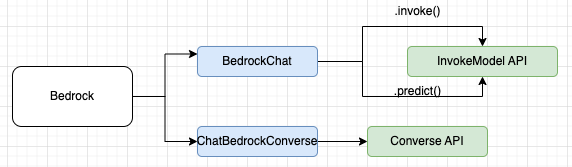

# Initializing the LangChain BedrockChat object

We use <b>BedrockChat</b> wrapper in working with InvokeModel API of the Bedrock. 

In [4]:
from langchain_community.chat_models import BedrockChat

In [5]:
import boto3

In [6]:
def initialize_llm():
    """
    Initialize a Large Language Model (LLM) instance using the Bedrock Runtime service.

    Returns:
        BedrockChat: An instance of the BedrockChat class, which represents the initialized LLM.

    """
    model_id = "anthropic.claude-3-sonnet-20240229-v1:0"  # In this notebook most of the times we use this model
    model_kwargs = {
        "max_tokens": 2048,
        "temperature": 0.0,
        "top_k": 250,
        "top_p": 1,
        "stop_sequences": ["\n\nHuman"],
    }

    # Check if AWS_REGION environment variable is set
    aws_region =  "us-west-2"

    bedrock_runtime = boto3.client(
        service_name="bedrock-runtime",
        region_name=aws_region,
    )

    bedrock_llm = BedrockChat(  #here we use the BedrockChat 
        client=bedrock_runtime,
        model_id=model_id,
        model_kwargs=model_kwargs,
    )

    return bedrock_llm
   
bedrock_llm = initialize_llm()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `BedrockChat` was deprecated in LangChain 0.0.34 and will be removed in 0.3. An updated version of the class exists in the langchain-aws package and should be used instead. To use it run `pip install -U langchain-aws` and import as `from langchain_aws import ChatBedrock`.
  warn_deprecated(


## Simple Call with the BedrockChat wrapper

We use Bedrock's <b>.invoke()</b> in this section. This method undestands the chat, meaning different types of messages: system message, human message and AI generated massage. 

If you just want to call LLM like this example, there is no value to use LangChain as we can simply call Bedrock APIs without using LangChain. 

The real value of LangChain is where we need more complex integration and orchestration. I use this simple example to start with a LangChain and show its abstration layer on tip of Bedrock APIs:

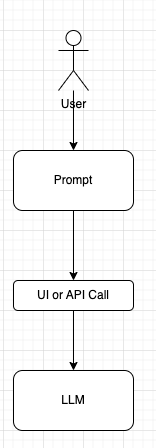

In [7]:
messages = [
    (
        "system", "You are a helpful AI student that would like to learn about AI topics. Respond in a frienly way.",
    ),
    
    ("human", "I want to know what is top_p in LLM configuration?"),
]
first_res = bedrock_llm.invoke(messages)
first_res

AIMessage(content="Sure, I'd be happy to explain what top_p is in the context of large language models (LLMs) configuration!\n\nTop_p, also known as nucleus sampling or top-k sampling, is a technique used during the text generation process in LLMs. It is a way to control the randomness and diversity of the generated text by limiting the number of tokens (words or subwords) that the model considers at each step of the generation process.\n\nHere's how it works:\n\n1. At each step of text generation, the LLM calculates the probability distribution over the entire vocabulary for the next token.\n2. Instead of simply selecting the token with the highest probability, top_p sampling selects from the smallest possible set of tokens whose cumulative probability exceeds a specified threshold value (p).\n3. The value of p is typically set between 0.9 and 1.0. A higher value of p means that the model will consider a larger set of tokens, leading to more diverse and potentially more surprising out

In [8]:
print(first_res.content)

Sure, I'd be happy to explain what top_p is in the context of large language models (LLMs) configuration!

Top_p, also known as nucleus sampling or top-k sampling, is a technique used during the text generation process in LLMs. It is a way to control the randomness and diversity of the generated text by limiting the number of tokens (words or subwords) that the model considers at each step of the generation process.

Here's how it works:

1. At each step of text generation, the LLM calculates the probability distribution over the entire vocabulary for the next token.
2. Instead of simply selecting the token with the highest probability, top_p sampling selects from the smallest possible set of tokens whose cumulative probability exceeds a specified threshold value (p).
3. The value of p is typically set between 0.9 and 1.0. A higher value of p means that the model will consider a larger set of tokens, leading to more diverse and potentially more surprising outputs. A lower value of p wi

In [9]:
#If you want to know how many tokens are used in the previous conversation:
print(first_res.response_metadata['usage'])

{'prompt_tokens': 45, 'completion_tokens': 385, 'total_tokens': 430}


#### Suggestion:#### it would be nice to show what we need to change in the above code if we use a different model

I have ansered the above question by using Titan Express. All I needed to do was to make usre I am using the right model and initialize it (this time I called it titan_initialze_llm)

In [10]:
titan_model_id = "amazon.titan-text-express-v1"
def titan_initialize_llm():
    """
    Initialize a Large Language Model (LLM) instance using the Bedrock Runtime service.

    Returns:
        BedrockChat: An instance of the BedrockChat class, which represents the initialized LLM.

    """
    model_id = titan_model_id
 

    # Check if AWS_REGION environment variable is set
    aws_region =  "us-west-2"

    bedrock_runtime = boto3.client(
        service_name="bedrock-runtime",
        region_name=aws_region,
    )

    bedrock_llm = BedrockChat(
        client=bedrock_runtime,
        model_id=model_id,
        #model_kwargs=model_kwargs,
    )

    return bedrock_llm
   
titan_bedrock_llm = titan_initialize_llm()

In [11]:
first_res = titan_bedrock_llm.invoke(messages)
first_res

AIMessage(content=' Hello! Top_p stands for top p sampling. It is a technique used in natural language processing to control the diversity of the generated text. In the context of large language models (LLMs), top_p sampling is used to determine which tokens to include in the generated text. The algorithm selects tokens based on their probability distribution, and the top_p value determines the percentage of tokens to include. For example, if top_p is set to 0.9, the algorithm will select the top 90% of tokens from the probability distribution to include in the generated text. This can help control the diversity of the', response_metadata={'model_id': 'amazon.titan-text-express-v1', 'usage': {'prompt_tokens': 43, 'completion_tokens': 128, 'total_tokens': 171}}, id='run-08d92c05-b257-4ec6-9aaf-c91d0180657d-0')

## LLM (.predict() ) vs Chat (.invoke() ) 

The <b>.predict()</b> method is an LLM method that has been deprecated. Still it's working but in next versions it may not work.

Please see the following link:


https://python.langchain.com/v0.2/api_reference/aws/llms/langchain_aws.llms.bedrock.BedrockLLM.html#langchain_aws.llms.bedrock.BedrockLLM.predict_messages

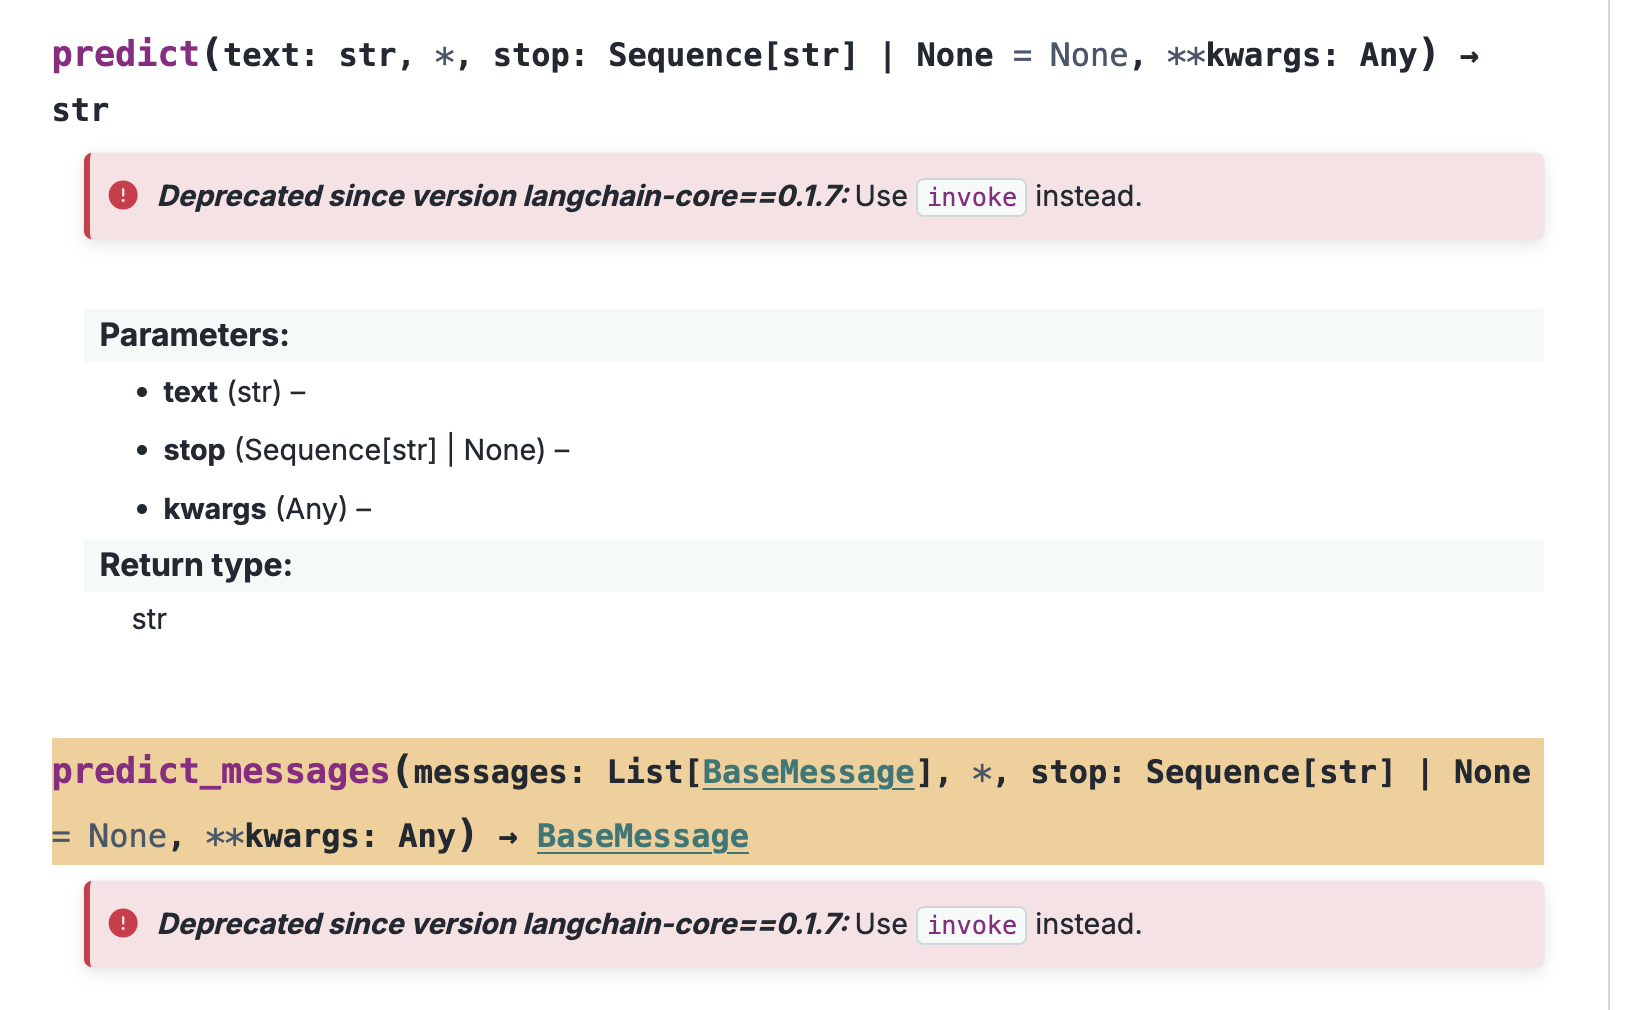



The interaction looks like this:
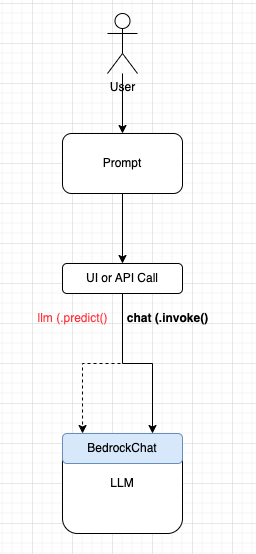

I start with one message only interaction before showing the interactions that looks like a chat. Here is one question by using .predict():

In [12]:
city = bedrock_llm.predict("I want to go hiking. Which city in California should I go to?")
print(city)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


Here are some great cities in California that offer excellent hiking opportunities nearby:

1. San Francisco - You can hike in Muir Woods National Monument, the Marin Headlands, or Mount Tamalpais State Park, all located just north of the city.

2. Los Angeles - Griffith Park has over 50 miles of hiking trails right in the city. You can also head to the Santa Monica Mountains for hikes like the Solstice Canyon Trail.

3. San Diego - Torrey Pines State Natural Reserve has beautiful coastal hiking trails. Mission Trails Regional Park is another huge urban park with many trails.

4. Sacramento - Hiking is available in parks like the American River Parkway and Folsom Lake Recreation Area on the outskirts of the city.

5. Santa Barbara - The Santa Ynez Mountains provide great hiking, including trails in Los Padres National Forest like Inspiration Point.

6. Lake Tahoe (cities like South Lake Tahoe) - The entire Lake Tahoe area has phenomenal hiking in the Sierra Nevada mountains.

Consider 

And here is asking the same one question by using .invoke(). Both work with no problem:

In [13]:
city = bedrock_llm.invoke("I want to go hiking. Which city in California should I go to?")
print(city.content)

Here are some great cities in California that offer excellent hiking opportunities nearby:

1. San Francisco - You can hike in Muir Woods National Monument, the Marin Headlands, or Mount Tamalpais State Park, all located just north of the city.

2. Los Angeles - Griffith Park has over 50 miles of hiking trails right in the city. You can also head to the Santa Monica Mountains for hikes like the Solstice Canyon Trail.

3. San Diego - Torrey Pines State Natural Reserve has beautiful coastal hiking trails. Mission Trails Regional Park is another huge urban park with many trails.

4. Sacramento - Folsom Lake State Recreation Area and the American River Parkway trail system provide great hiking very close to downtown.

5. Santa Barbara - Hike in the Santa Ynez Mountains, including trails in Los Padres National Forest like Inspiration Point.

6. Oakland/Berkeley - Redwood Regional Park and Tilden Regional Park in the Oakland Hills have wonderful redwood forest hikes.

Some other top hiking d

But becuase we did not use chat message formatting it does not have a context of previous conversation and if you ask a question that is related to earlier answer it fails:

In [14]:
other_activities = bedrock_llm.invoke("What else can I do in those cities you mentioned?")
other_activities

AIMessage(content="Unfortunately, I did not actually mention any specific cities in our conversation so far. I don't have enough context to recommend activities in particular cities. Could you provide the names of the cities you're interested in, and I'd be happy to suggest some things to do and see there based on what those destinations offer?", response_metadata={'model_id': 'anthropic.claude-3-sonnet-20240229-v1:0', 'usage': {'prompt_tokens': 18, 'completion_tokens': 65, 'total_tokens': 83}}, id='run-0f5a6771-53ec-4e33-a818-f93cee04dfa9-0')

In [15]:
other_activities.content

"Unfortunately, I did not actually mention any specific cities in our conversation so far. I don't have enough context to recommend activities in particular cities. Could you provide the names of the cities you're interested in, and I'd be happy to suggest some things to do and see there based on what those destinations offer?"

OK now that you saw how important is to provide right messaging format, let's define a message format with correct roles and try the .invoke() and .predict() again. The following cell defines a right messaging format and it use .invoke():

In [16]:
messages = [
    (
        "system", "You are a helpful AI student that would like to learn about AI topics. Respond only in one sentence.",
    ),
    
    ("human", "I want to know what is top_p in LLM configuration?"),
]
first_res = bedrock_llm.invoke(messages)
first_res.content

'Top_p is a sampling technique used in language models to control the randomness of generated text by considering only the most probable tokens at each step.'

To text if .invoke() understands the context, now we assemble the previous response into the next message and ask a new question:

In [17]:
messages = [
    (
        "system", "You are a helpful AI student that would like to learn about AI topics. Respond only in one sentence.",
    ),
    
    ("human", "I want to know what is top_p in LLM configuration?"),
     ("ai", "Top_p is a sampling technique used in language models to control the randomness of generated text by considering only the most probable tokens at each step."),
    ("human", "Why is that useful?"),
]
first_res = bedrock_llm.invoke(messages)
first_res.content

'Top_p sampling helps prevent the model from generating unlikely or nonsensical text by focusing on the most probable tokens.'

As you saw above, if we include previous context in communication with .invoke() API, it works with no problem. But will that work with .predict() too? Here is the result: 

In [18]:
messages = [
    (
        "system", "You are a helpful AI student that would like to learn about AI topics. Respond only in one sentence.",
    ),
    
    ("human", "I want to know what is top_p in LLM configuration?"),
     ("ai", "Top_p is a sampling technique used in language models to control the randomness of generated text by considering only the most probable tokens at each step."),
    ("human", "Why is that useful?"),
]
first_res = bedrock_llm.predict(messages)
first_res.content

ValidationError: 9 validation errors for HumanMessage
content
  str type expected (type=type_error.str)
content -> 0
  str type expected (type=type_error.str)
content -> 0
  value is not a valid dict (type=type_error.dict)
content -> 1
  str type expected (type=type_error.str)
content -> 1
  value is not a valid dict (type=type_error.dict)
content -> 2
  str type expected (type=type_error.str)
content -> 2
  value is not a valid dict (type=type_error.dict)
content -> 3
  str type expected (type=type_error.str)
content -> 3
  value is not a valid dict (type=type_error.dict)

# Working with Converse Bedrock API

The <b>ChatBedrockConverse</b> wrapper works with Bedrock Converse API.

AWS has recently released the Bedrock Converse API which provides a unified conversational interface for Bedrock models. 

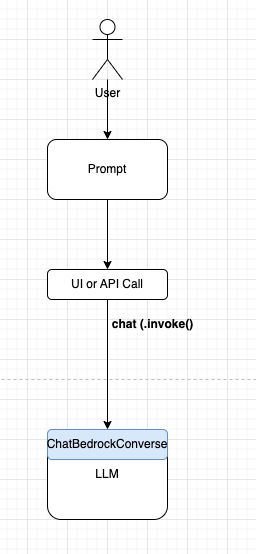

In [19]:
! pip install -qU langchain-aws


In [20]:
from langchain_aws import ChatBedrockConverse

In [21]:
def converse_initialize_llm():
    """
    Initialize a Large Language Model (LLM) instance using the Bedrock Runtime service.

    Returns:
        BedrockChat: An instance of the ChatBedrockConverse class, which represents the initialized LLM.

    """
    model = "anthropic.claude-3-sonnet-20240229-v1:0"
    model_kwargs = {
        "max_tokens": 2048,
        "temperature": 0.0,
        "top_k": 250,
        "top_p": 1,
        "stop_sequences": ["\n\nHuman"],
    }

    # Check if AWS_REGION environment variable is set
    aws_region =  "us-west-2"

    bedrock_runtime = boto3.client(
        service_name="bedrock-runtime",
        region_name=aws_region,
    )

    bedrock_llm = ChatBedrockConverse( # here I use ChatBedrockConverse 
        client=bedrock_runtime,
        model=model,
        #model_kwargs=model_kwargs,
    )

    return bedrock_llm
   
bedrock_llm_converse = converse_initialize_llm()

In [22]:
messages = [
    (
        "system", "You are a helpful AI student that would like to learn about AI topics. Respond only in one sentence.",
    ),
    
    ("human", "I want to know what is top_p in LLM configuration?"),
     ("ai", "Top_p is a sampling technique used in language models to control the randomness of generated text by considering only the most probable tokens at each step."),
    ("human", "Why is that useful?"),
]
first_res = bedrock_llm_converse.invoke(messages)
first_res.content

'Top_p sampling helps prevent the model from generating unlikely or nonsensical outputs while still allowing for some diversity in the generated text.'

# Prompt Template

Imagine you have a prompt that some parts of that prompt is different in each user call. For example, if users want to know more about different parameters in Becrock model, rather than typing most parts of the following prompt every time, they can just mention the parts that are different than the other ones, like those parameters in the {} in the following paragraph:

#### <i>Write one educational paragraph about {parameter} in Bedrock {modelname} model. </i>



That means, users do not give the prompt itself to LLM rather they give the required "inputs" to a <b> prompt template<b>  and then by a simple string interpolation, the prompt is generated before sending that to LLM. Where that prompt is generated? Inside the LangChain by using PromptTemplate.

Usually a UI collects the inputs from the user, although a user can send those inputs through direct API call inside a code as well. The flow is shown in the following figure:

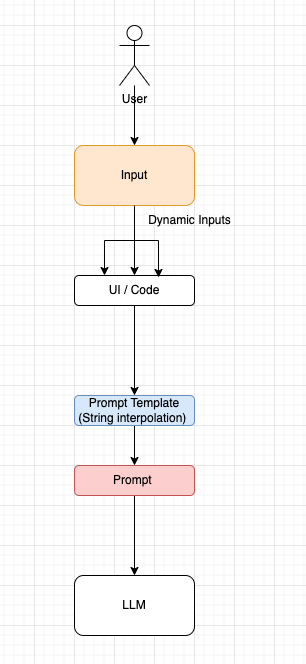

To allow users to NOT to input all the prompt text in each call, we need to use a prompt template and let LangChain to replace the placeholders with string text. LangChain connverts the <b>prompt template</b> to a <b>prompt</b> before sending that to LLM. 

In addition to gathering inputs from user, we can also enrich the generated prompt by adding personas or system messages before sedning the final prompt to LLM.

#### Using PromptTemplate:
To use prompt templates in Langchain we need to use PromptTemplate. It needs two inputs: the input variable names and the template itself. Later, to interpolate the variable names with values we use .format() method:

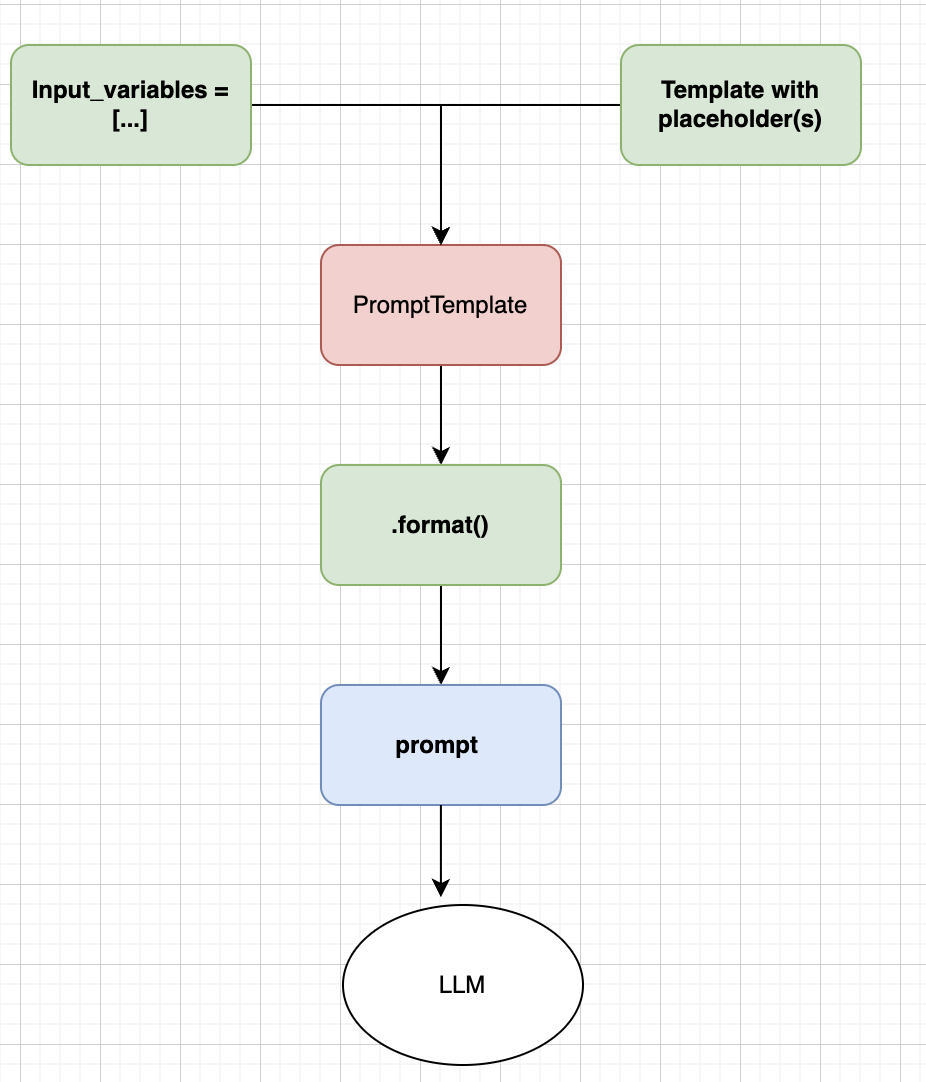

Let's see them in practice:

In [23]:
from langchain import PromptTemplate

educational_message_template = PromptTemplate(
    input_variables =['parameter', 'modelname'],
    template = "Write one educational paragraph about {parameter} in Bedrock {modelname} model."
)
final_prompt = educational_message_template .format(parameter="top_p" , modelname= 'claude')
print(final_prompt)

Write one educational paragraph about top_p in Bedrock claude model.


Now we use the same methods we learned before to send this prompt to the model:

In [24]:
res = bedrock_llm.invoke(final_prompt)
res

AIMessage(content="In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity.", response_metadata={'model_id': 'anthropic.claude-3-sonnet-20240229-v1:0', 'usage': {'prompt_tokens': 22, 'completion_tokens': 171, 'total_tokens': 193}}, id='run-5a5fc2db-71a

to get a more clean result:

In [25]:
res = bedrock_llm.invoke(final_prompt).content
res

"In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity."

#### Using ChatPromptTemplate:

Using PromptTemplate is sufficient if we want to have isolated conversations with AI. But if we want AI to answer a question based on previous messages (historical context), we need to include the previous messages while asking new question. This is where ChatPromptTemplate comes into the picture.

#### NOTE: #### 
please consider that we already discussed the idea of using right message formatting but over there we did not do any string interpolation in different types of messages. This time when we assemble the template we have placeholders too:

In [26]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful AI expert that answers a student query"),
        ("human", "what top_p in Bedrock claude model is all about?"),
        ("ai", "In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity."),
        ("human", "{user_query}"),
    ]
)

messages = chat_template.format_messages(user_query="is it related to top_k?")
messages

[SystemMessage(content='You are a helpful AI expert that answers a student query'),
 HumanMessage(content='what top_p in Bedrock claude model is all about?'),
 AIMessage(content="In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity."),
 HumanMessage

In [27]:
messages[0]

SystemMessage(content='You are a helpful AI expert that answers a student query')

In [28]:
messages[1]

HumanMessage(content='what top_p in Bedrock claude model is all about?')

In [29]:
messages[2]

AIMessage(content="In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity.")

In [30]:
messages[3]

HumanMessage(content='is it related to top_k?')

Another way to write the above chat mesages is through Human, System and AI message templates. There is no difference in the generated output by LLM, that is just to separate them into different templates:

In [31]:
from langchain_core.prompts import HumanMessagePromptTemplate, SystemMessagePromptTemplate, AIMessagePromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        SystemMessagePromptTemplate.from_template("You are a helpful AI expert that answers a student query"),
        HumanMessagePromptTemplate.from_template("{query}"),
    ]
)
messages = chat_template.format_messages(query="what top_p in Bedrock claude model is all about?")
messages

[SystemMessage(content='You are a helpful AI expert that answers a student query'),
 HumanMessage(content='what top_p in Bedrock claude model is all about?')]

#### Using few shot and prompt templates

In few shot technique we provide examples. Those could be a long piece of text. When the we need to pass a long text into a prompt in few shot technique, it's better we create a variable for the entire prompt text and send it as a whole to the PromptTemplate: 

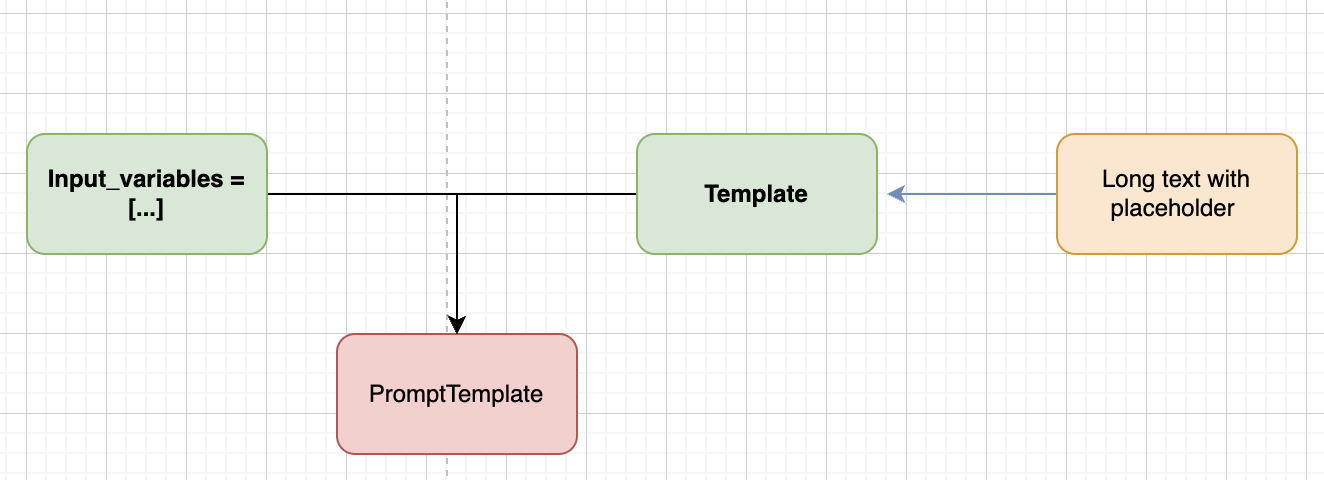

In [32]:
template = """You are a helpful AI instrcutor.

Human: {human_ask}
Assistant:"""

prompt = PromptTemplate(
    input_variables=["human_ask"], 
    template=template
)

prompt

PromptTemplate(input_variables=['human_ask'], template='You are a helpful AI instrcutor.\n\nHuman: {human_ask}\nAssistant:')

Now imagine in the above <b>template</b> variable, we want to include all the few shot examples:

In [33]:
few_shots_examples = [
    {
        "review": "I love this course",
        "sentiment": "positive"
    }, {
        "review": "I did not have much experience with AI ",
        "sentiment": "neutral"
    },{
        "review": "This topic is really hard and I will not be able to pass this course.",
        "sentiment": "negative"
    }
]


Earlier we also learned how to create a PromptTemplate with two variables: <b>input_variables</b> and <b>template</b>: 

<code>
educational_message_template = PromptTemplate(
    input_variables =['parameter', 'modelname'],
    template = "Write one educational paragraph about {parameter} in Bedrock {modelname} model."
)
</code>

But now in the <b> template </b> we want to pass many examples (few shots) in the format of human mesages and ai messages. So a bit of formatting in template is necessary: 



In [34]:
few_shots_prompt = PromptTemplate(
    input_variables=["review", "sentiment"],
    template= """
             human: {review}
             ai: {sentiment}
            """
)

print(few_shots_prompt.format(**few_shots_examples[0]))


             human: I love this course
             ai: positive
            


In [35]:
print(few_shots_prompt.format(**few_shots_examples[1]))


             human: I did not have much experience with AI 
             ai: neutral
            


Now we need to assemble everything into one prompt along with new review. That assembeling mechanism is <b> FewShotPromptTemplare</b>:

In [36]:
from langchain import FewShotPromptTemplate

In [37]:
instruction = "Identify the sentiment of the following sentence in one word"
new_review = "Wow, this is an amazing framework to use."

few_shot_prompt_template = FewShotPromptTemplate(
    examples=few_shots_examples, # all examples are passed here
    example_prompt=few_shots_prompt, # examples are incorporated into a Prompt Template
    prefix=instruction, # what do we want AI to do
    suffix=new_review, # new review to be analyzed 
    input_variables=["review"], # which variable holds the new input when we call .format()
    
)



print(few_shot_prompt_template.format(review=new_review))


Identify the sentiment of the following sentence in one word


             human: I love this course
             ai: positive
            


             human: I did not have much experience with AI 
             ai: neutral
            


             human: This topic is really hard and I will not be able to pass this course.
             ai: negative
            

Wow, this is an amazing framework to use.


In [38]:
res = bedrock_llm.invoke(few_shot_prompt_template.format(review=new_review))

In [39]:
res.content

'Positive'

# Chains

We have seen how to get input from user, format it with prompt teamplates and call LLM after. We can connect all these activties into one module as a whole. That is  called a chain in LangChain. 

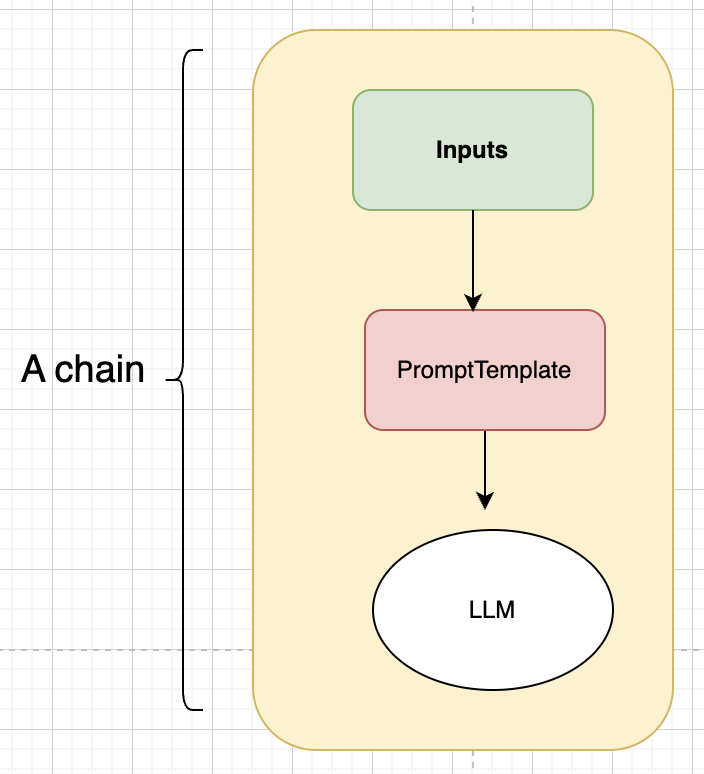

When you create a chain you can run the entire chain with a single line of code. You can also add memory to the chain.

#### Generic chains: LLM Chain

For more information please see this link:

https://github.com/pinecone-io/examples/blob/master/learn/generation/langchain/handbook/02-langchain-chains.ipynb 


This type of chain is a very generic chain in the sense that it does <b>not</b> have any specific pre-fabricated behavoir. It just does what user has requested to do in the chain. Later we will see more specialized chains that they change input and outputs based on what they are instructed to do.

The LLM generic chains do not change the input of the chain and do not change the format the output beyond what is already instructed by the creator of the chain.  

We use <b>LLMChain</b> in LangChain to implement this type of chain. Please consider that we do not need to do string interpolate by format() when we use chain. The chain itself does that for us:

In [40]:
from langchain.chains import LLMChain

educational_message_template = PromptTemplate(
    input_variables =['parameter', 'modelname'],
    template = "Write one educational paragraph about {parameter} in Bedrock {modelname} model."
)
#final_prompt = educational_message_template .format(parameter="top_p" , modelname= 'claude')
print(final_prompt)
bedrock_llm = initialize_llm()


chain = LLMChain(llm=bedrock_llm, prompt=educational_message_template)
chain.run(parameter="top_p", modelname= 'claude')

Write one educational paragraph about top_p in Bedrock claude model.


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


"In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity."

Instread of <b>chain.run()</b> we could also use <b>chain.invoke()</b>. As you see below, we need to provide the parameters in the form of <b>input={} </b>: 

In [41]:
chain.invoke(input={"parameter" : "top_p", "modelname" : 'claude'})

{'parameter': 'top_p',
 'modelname': 'claude',
 'text': "In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity."}

We could also pass multiple parameters(inputs) at once and use <b> chain.apply</b>:

In [42]:

educational_message_template = PromptTemplate(
    input_variables =['parameter'],
    template = "Write one educational paragraph about {parameter} in Bedrock Claude model."
)
param_list = [
    {"parameter": "top_p"},
    {"parameter": "top_k"},
    {"parameter": "temperature"}
]


chain = LLMChain(llm=bedrock_llm, prompt=educational_message_template)

chain.apply(param_list)

[{'text': "In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity."},
 {'text': "In the Bedrock Claude model, top_k is a hyperparameter that controls the degree of randomness during the text generation process. It specifies the number of highest-proba

If you want to see how many tokens are used in the above 

In [43]:
chain.generate(param_list)

LLMResult(generations=[[ChatGeneration(text="In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity.", message=AIMessage(content="In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative 

#### Utility Chains: LLMMathChain

LangChain has created chains to do some activities for us. In this case the chain changes our inputs/prompts and it parses the generated output before showing the result to us. 

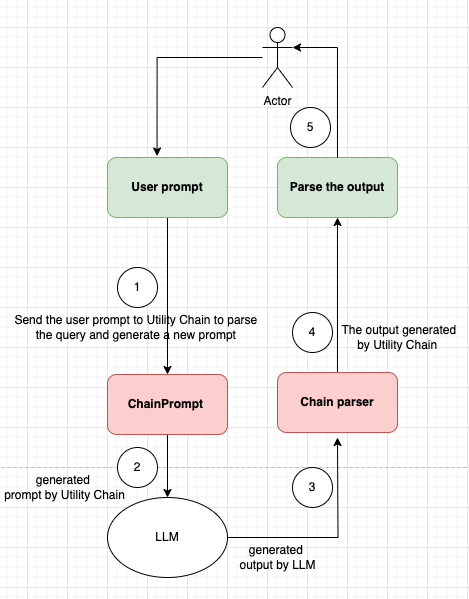

In [44]:
745 ** 0.753

145.4566808899015

If we ask this question from LLM, will we get a correct answer? As you see below the answer is NO:

In [45]:
from langchain.chains import LLMChain

calculator_template = PromptTemplate(
    input_variables =['base', 'power'],
    template = "what is {base} raised to the {power} power?"
)

print(calculator_template)
bedrock_llm = initialize_llm()


chain = LLMChain(llm=bedrock_llm, prompt=calculator_template)
chain.run(base=745, power= 0.753)

input_variables=['base', 'power'] template='what is {base} raised to the {power} power?'


'To calculate 745 raised to the 0.753 power, we can use the following steps:\n\n1) Take the logarithm (base 10) of both the base (745) and the exponent (0.753):\nlog(745) = 2.872\nlog(0.753) = -0.123\n\n2) Multiply the logarithm of the base by the exponent:\n2.872 * (-0.123) = -0.353\n\n3) Take the antilogarithm (base 10) of the result to get the final answer:\n10^(-0.353) = 0.444\n\nTherefore, 745 raised to the 0.753 power is approximately equal to 0.444.'

Now let's solve this problem with a speciazlized math chain (<b>LLMMacthChain</b> ) that LangChain offers.It asks LLM to generate a Python code to solve a mathematical problem and after getting the code, it runs the code and shows the response. 

First consider that in the following code, I had to use <b>from_llm</b> after <b>LLMMacthChain</b> call. 

After initilaizing <b>LLMMacthChain</b>  I also wanted to see what LLMMathChain does behind the scene when I run it. For that, I used <b> llm_math.prompt.template</b> in the last line of the following cell. As you can see in the reponse, <b>LLMMacthChain</b>  changes my prompt (user prompt) to something else:


In [46]:
from langchain import LLMMathChain
bedrock_llm = initialize_llm()
llm_math = LLMMathChain.from_llm(bedrock_llm, verbose=True)
print(llm_math.prompt.template)


Translate a math problem into a expression that can be executed using Python's numexpr library. Use the output of running this code to answer the question.

Question: ${{Question with math problem.}}
```text
${{single line mathematical expression that solves the problem}}
```
...numexpr.evaluate(text)...
```output
${{Output of running the code}}
```
Answer: ${{Answer}}

Begin.

Question: What is 37593 * 67?
```text
37593 * 67
```
...numexpr.evaluate("37593 * 67")...
```output
2518731
```
Answer: 2518731

Question: 37593^(1/5)
```text
37593**(1/5)
```
...numexpr.evaluate("37593**(1/5)")...
```output
8.222831614237718
```
Answer: 8.222831614237718

Question: {question}



In the above output you see that through few-shots prompt technqiue, LLMMathChain is generating a Python expressions like numexpr.evaluate(). 

#### NOTE: ####  
I was getting error due to the fact that Bedrock LLMs generate code with ... before and ... after the numexpr code. So I had to enforce not to do that by adding extra instruction in the prompt. I added this in the following code: Just generate an numexpr.evaluate() expresion for that.

In [47]:
res=llm_math.run("what is 745 raised to the 0.753 power? Just generate an numexpr.evaluate() expresion for that. ")




> Entering new LLMMathChain chain...
what is 745 raised to the 0.753 power? Just generate an numexpr.evaluate() expresion for that. ```text
745**(0.753)
```
...numexpr.evaluate("745**(0.753)")...

Answer: 145.4566808899015
> Finished chain.


#### Utility Chains: Sequential chain

Another utility chain is sequantial chain. We can connect two chains sequentially through <b> SequentialChain </b> utility chain.

In the following example, I used a chain called "educational chain" to answer a question. Then I used its "output" as input to the second chain (quiz_chain)  to generate multiple choice questions. Then I chained the sequantially.

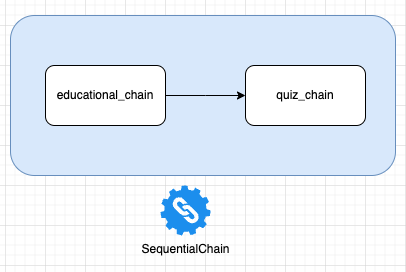

In [48]:
from langchain.chains import SequentialChain
educational_text = PromptTemplate(
    input_variables =['parameter'],
    template = "Write one educational paragraph about {parameter} in Bedrock Claude model."
)

educational_chain = LLMChain(llm=bedrock_llm, prompt=educational_text, output_key="text1")


quiz_text = PromptTemplate(
    input_variables=["text1"], 
    template="""Generate a multiple choice question for this text:{text1} """
)

quiz_chain = LLMChain(llm=bedrock_llm, prompt=quiz_text, output_key="text2")

seq_chain = SequentialChain(
    chains = [educational_chain , quiz_chain],
    input_variables = ["parameter"],
    output_variables = ["text1","text2"]
)

seq_chain({"parameter": "top_p"})


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


{'parameter': 'top_p',
 'text1': "In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity.",
 'text2': 'Question: What is the primary advantage of using top_p sampling in the Bedrock Claude model compared to top-k sampling?\n\nA. It generates more repe

In [49]:
print(seq_chain({"parameter": "top_p"})["text1"])

In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity.


In [50]:
print(seq_chain({"parameter": "top_p"})["text2"])

Question: What is the primary advantage of using top_p sampling in the Bedrock Claude model compared to top-k sampling?

A. It generates more repetitive text.
B. It allows for the inclusion of lower-probability tokens, leading to more diverse text generation.
C. It considers only the top-k tokens, resulting in less diverse text generation.
D. It does not consider the probability distribution of the tokens.


## Using | operator to create a chain 

The pipe (|) operator is part of LangChain Expression Language (LCEL). LangChain has started to use a different methods to create more complex chains rather than creating them utility chains. 

For example, rather than using LLMChain that I expalined above, we can use pipe (|)  operator to create a chain as shown below: 


In [51]:
#from langchain.chains import LLMChain

educational_message_template = PromptTemplate( 
    input_variables =['parameter', 'modelname'], 
    template = "Write one educational paragraph about {parameter} in Bedrock {modelname} model." ) 
#final_prompt = educational_message_template .format(parameter="top_p" , modelname= 'claude') print(final_prompt) bedrock_llm = initialize_llm()

#chain = LLMChain(llm=bedrock_llm, prompt=educational_message_template) #chain.run(parameter="top_p", modelname= 'claude')


chain1 = educational_message_template | bedrock_llm 

In [52]:
text1=chain1.invoke(input={"parameter" : "top_p", "modelname" : 'claude'}).content
text1

"In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity."

We can also achive the same by using <b>.pipe()</b> method as shown below:

In [53]:
quiz_template = PromptTemplate(
    input_variables=["text1"], 
    template="""Generate a multiple choice question for this text: {text1}. """
)
chain2 = quiz_template.pipe(bedrock_llm)

In [54]:
print(chain2.invoke(input={"text1" : {text1}}).content)

What is the purpose of the top_p sampling technique in the Bedrock Claude model?

A. To select the most probable tokens from the model's output distribution.
B. To consider only the top-k tokens during text generation.
C. To allow for the inclusion of lower-probability tokens, leading to more diverse and less repetitive text generation.
D. To ensure that the selected tokens represent a small portion of the probability mass.


NOTE: We can also use | operator to create sequential chain rather than using SequentialChain

## Output Parsers

We can use output parsers to get the response back in a specified format.

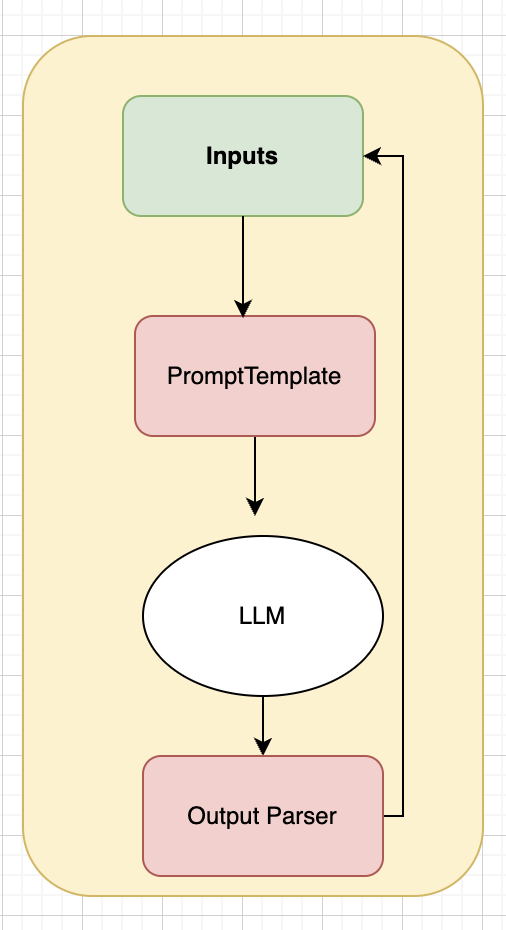

### strOutputParser()

Compare the following code block with the first example under "Using | operator to create a chain " title above that we had to use .content. We use this techique to get only the string part of response:

In [55]:
from langchain.chains import SequentialChain

from langchain_core.output_parsers import StrOutputParser


educational_message_template = PromptTemplate( 
    input_variables =['parameter', 'modelname'], 
    template = "Write one educational paragraph about {parameter} in Bedrock {modelname} model." ) 
chain = educational_message_template | bedrock_llm | StrOutputParser()

In [56]:
chain.invoke(input={"parameter" : "top_p", "modelname" : 'claude'})

"In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity."

Now that you know what Output Parser is you can add that to a more complex chain, where we have two steps chain. As you see, in the following code we do not define the outputs in the PromptTemplate. The output of the educational_chain is passed to quiz_text PromptTemplate:

In [57]:
from langchain_core.output_parsers import StrOutputParser
educational_message_template = PromptTemplate( 
    input_variables =['parameter', 'modelname'], 
    template = "Write one educational paragraph about {parameter} in Bedrock {modelname} model." ) 

educational_chain = LLMChain(llm=bedrock_llm, prompt=educational_text)


quiz_text = PromptTemplate(
    input_variables=["text1"], 
    template="""Generate a multiple choice question for this text:{text1} """
)

quiz_chain = LLMChain(llm=bedrock_llm, prompt=quiz_text)

combined_chain = educational_message_template | bedrock_llm | StrOutputParser() | quiz_chain
combined_chain.invoke(input={"parameter" : "top_p", "modelname" : 'claude'})

{'text1': "In the Bedrock Claude model, top_p is a sampling technique used during the text generation process. It is an alternative to the more commonly used top-k sampling method. Top_p sampling works by selecting the most probable tokens from the model's output distribution, but instead of considering only the top-k tokens, it considers the smallest set of tokens whose cumulative probability mass exceeds a specified threshold (p). This approach can lead to more diverse and less repetitive text generation, as it allows for the inclusion of lower-probability tokens that may not be present in the top-k set. The value of p is typically set to a high value, such as 0.9 or 0.95, to ensure that the selected tokens represent a significant portion of the probability mass while still allowing for some diversity.",
 'text': 'Question: What is the primary advantage of using top_p sampling in the Bedrock Claude model compared to top-k sampling?\n\nA. It generates more repetitive text.\nB. It allo

### structuredOutputParser()

When we want the output to be in a specific structured format, we use this technique. The first thing we should do us to create the ResponseSchema. It has names and descriptions:

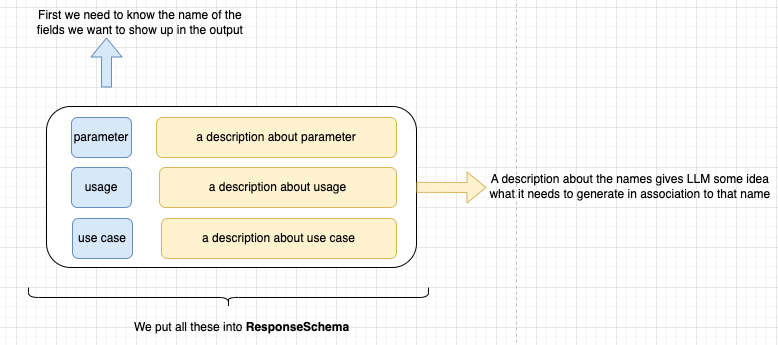

Imagine we use ResponseSchema to create instructions to LLM about how to format the outputs later. It may have multiple fileds and each field has its own description.

In [58]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain_core.prompts import PromptTemplate


response_schemas = [
    ResponseSchema(name="parameter", description="parameter entered by user"),
    ResponseSchema(name="usage", description="One line explaining what that is the usage of the given parameter by user"),
    ResponseSchema(name="example", description="An example of how that parameter changes the response from LLM"),
    ResponseSchema(name="usecase", description="a paragraph that shows how that helps in real world")
]
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()

print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"parameter": string  // parameter entered by user
	"usage": string  // One line explaining what that is the usage of the given parameter by user
	"example": string  // An example of how that parameter changes the response from LLM
	"usecase": string  // a paragraph that shows how that helps in real world
}
```


Now that you have a complex instruction about the way the output must look like, we pass that as one of the requirements to the prompt through PromptTemplate:

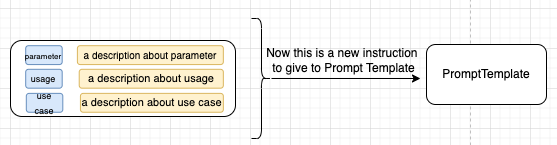

In [59]:
prompt = PromptTemplate(
    template="Provide the usage, an example of how the parameter is used and one use case of this parameter in LLM: {parameter}.\n{format_instructions}",
    input_variables=["parameter"],
    partial_variables={"format_instructions": format_instructions}  # this format instruction is part of the template and is coming from response schema (prev cell)
)
bedrock_llm = initialize_llm()

chain = prompt | bedrock_llm | output_parser

chain.invoke("top_p")

{'parameter': 'top_p',
 'usage': 'The top_p parameter controls the nucleus sampling strategy used for text generation.',
 'example': 'With top_p=0.9, the model will consider the top 90% most likely tokens at each step during generation, leading to more diverse and less repetitive outputs compared to greedy sampling.',
 'usecase': 'The top_p parameter is useful when you want to balance between diversity and coherence in the generated text. By restricting the sampling to the most likely tokens, it helps prevent the model from generating nonsensical or irrelevant text, while still allowing for some variation and creativity. This can be particularly useful in creative writing tasks, dialogue generation, or any application where you want the output to be both coherent and diverse. It can also help mitigate the risk of generating offensive or inappropriate content by excluding low-probability tokens that may be more likely to contain such content.'}

### comma separated list 

When we want to get the output in the form of comma separated format

In [60]:
from langchain.output_parsers import CommaSeparatedListOutputParser
output_parser = CommaSeparatedListOutputParser()
format_instructions = output_parser.get_format_instructions()
prompt = PromptTemplate(
    template="List five {topics_to_learn_in}.\n{format_instructions}",
    input_variables=["topics_to_learn_in"],
    partial_variables={"format_instructions": format_instructions},
)
chain = prompt | bedrock_llm  | output_parser 

In [61]:
print(format_instructions)

Your response should be a list of comma separated values, eg: `foo, bar, baz` or `foo,bar,baz`


In [62]:
chain.invoke({"topics_to_learn_in": "AI"})

['ChatGPT', 'Alexa', 'Siri', 'Google Assistant', 'IBM Watson.']

# Memory

To save the previous conversation with chatbot we need to create a memory and give the context to the AI when we converse.

LangChain create and manages the memory for us. At the begning the memory is empty:

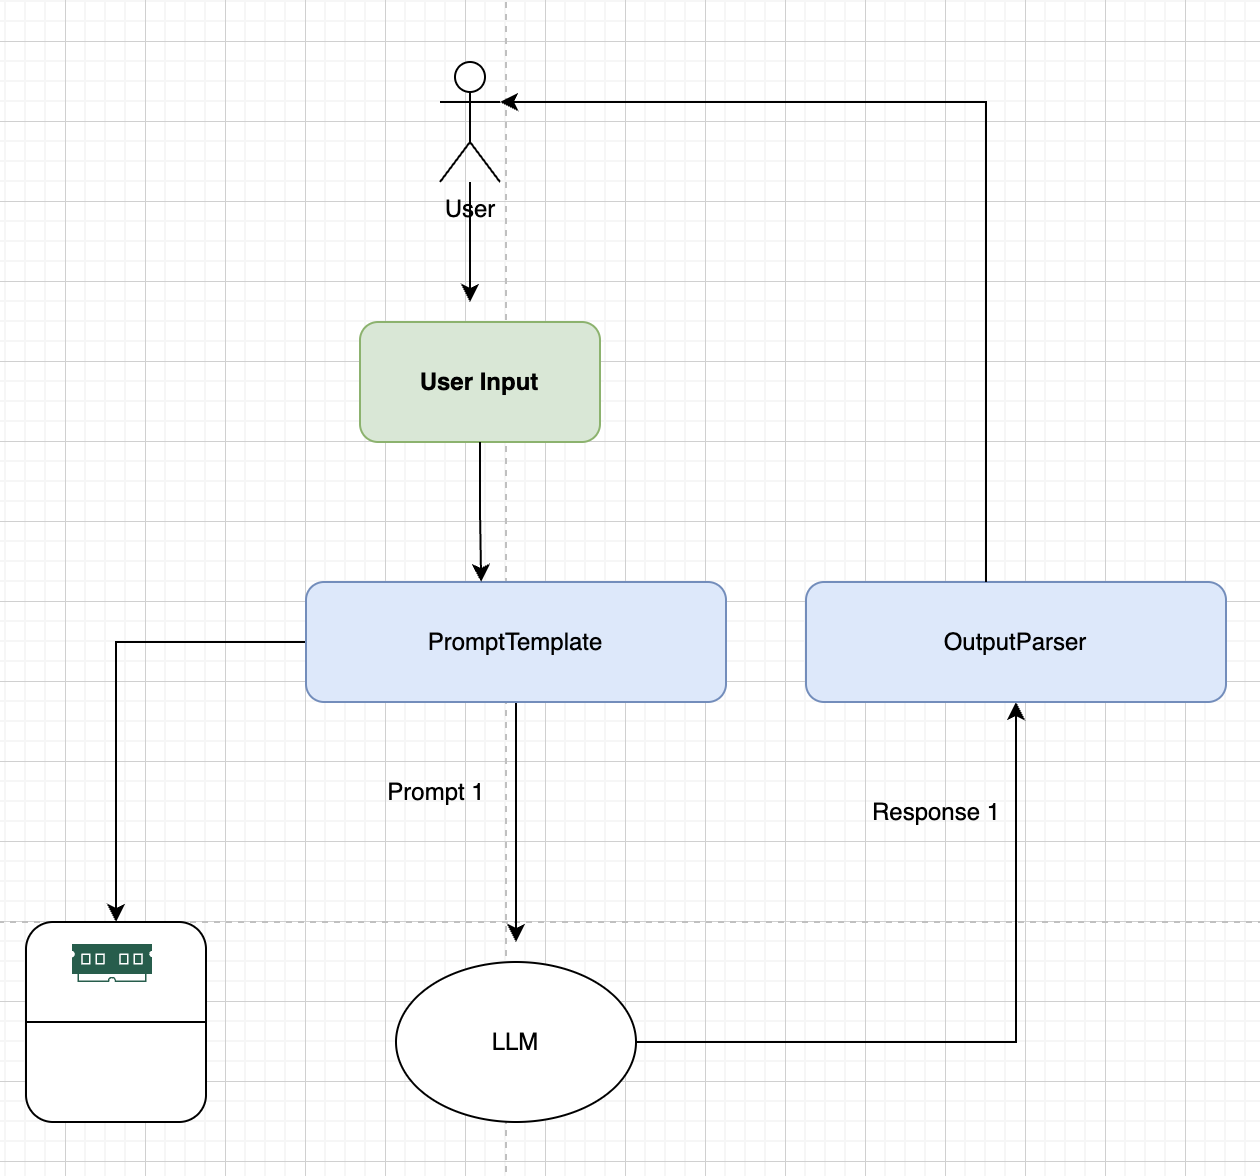

Then in the next round, the memory along with prompt 2 is sent to LLM. So LLM will know about the history of the conversation:
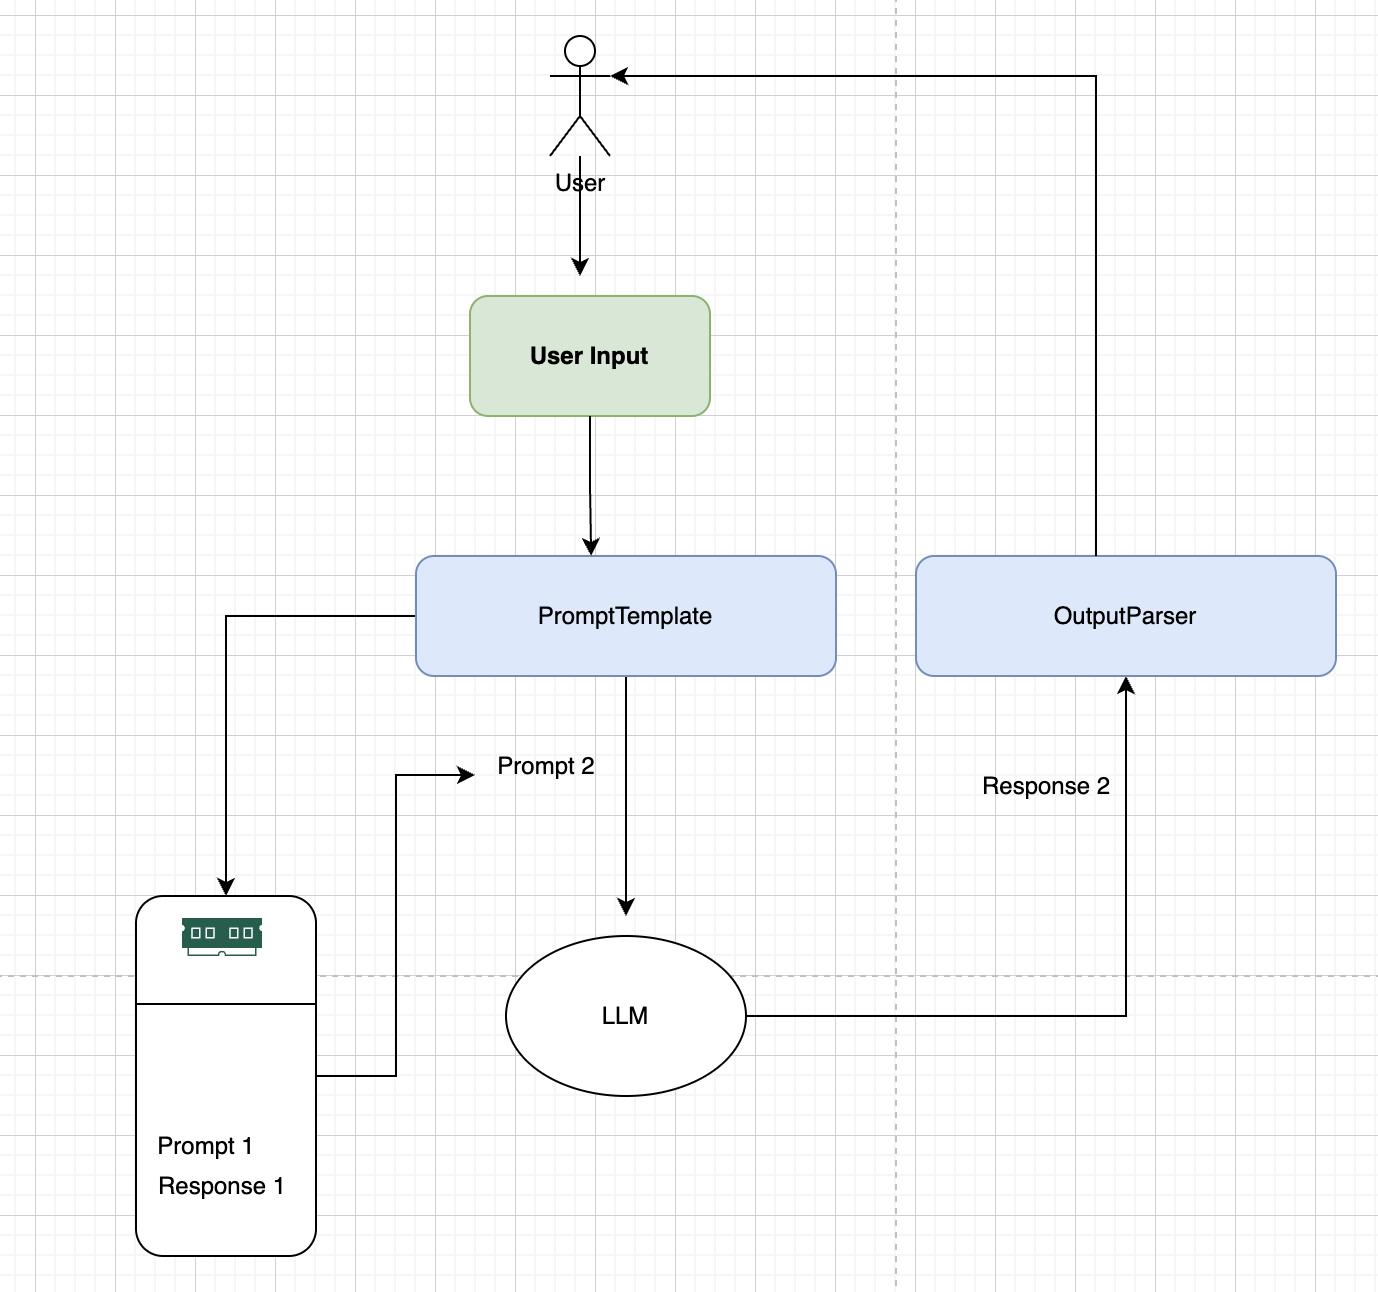

There are different types of memories:
- Store the entire conversation (ConversationBufferMemory)
- Store only the last few messages (ConversationBufferWindowMemory)
- Store a summary of the conversation (ConversatioSummaryMemory)

These memories work with chains in LangChain

#### Using memory with LLMChain (using ConversationBufferMemory)
In this case when we create a chain, we add memory to it:

In [63]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain

educational_message_template = PromptTemplate(
    input_variables =['history', 'input'],
    template = '''You are an AI expert.
    chat_history : {history}
    human: {input}
    ai: '''
)

memory = ConversationBufferMemory()

bedrock_llm = initialize_llm()


chain = LLMChain(llm=bedrock_llm, prompt=educational_message_template, memory = memory, verbose=True)

print(chain.run(input="why a parameter like top_p is important at all?"))



> Entering new LLMChain chain...
Prompt after formatting:
You are an AI expert.
    chat_history : 
    human: why a parameter like top_p is important at all?
    ai: 

> Finished chain.
The `top_p` parameter, also known as nucleus sampling or top-p sampling, is an important technique used in natural language generation models, such as GPT (Generative Pre-trained Transformer) models. It helps to control the diversity and creativity of the generated text while maintaining coherence and relevance.

Here are a few reasons why the `top_p` parameter is important:

1. **Mitigating the repetition problem**: Language models can sometimes generate repetitive or nonsensical text, especially when generating longer sequences. The `top_p` parameter helps to mitigate this issue by introducing controlled randomness in the text generation process, leading to more diverse and interesting outputs.

2. **Balancing diversity and coherence**: By adjusting the `top_p` value, you can control the trade-off 

In [64]:
print(chain.run(input="explain number 5 to me"))



> Entering new LLMChain chain...
Prompt after formatting:
You are an AI expert.
    chat_history : Human: why a parameter like top_p is important at all?
AI: The `top_p` parameter, also known as nucleus sampling or top-p sampling, is an important technique used in natural language generation models, such as GPT (Generative Pre-trained Transformer) models. It helps to control the diversity and creativity of the generated text while maintaining coherence and relevance.

Here are a few reasons why the `top_p` parameter is important:

1. **Mitigating the repetition problem**: Language models can sometimes generate repetitive or nonsensical text, especially when generating longer sequences. The `top_p` parameter helps to mitigate this issue by introducing controlled randomness in the text generation process, leading to more diverse and interesting outputs.

2. **Balancing diversity and coherence**: By adjusting the `top_p` value, you can control the trade-off between diversity and coheren

#### Using memory with Conversation Chain 
If we use ConversationChain we do not need to create PromptTemplate and history as we did in LLMChain. Here is a simple example:



In [65]:
from langchain.chains import ConversationChain
memory = ConversationBufferMemory(memory_key="history")



chain = ConversationChain(llm=bedrock_llm, memory = memory, verbose=True)

chain.invoke({"input": "Which country has the tallest tower?"})

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use RunnableWithMessageHistory: https://api.python.langchain.com/en/latest/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html instead.
  warn_deprecated(




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Which country has the tallest tower?
AI:

> Finished chain.


{'input': 'Which country has the tallest tower?',
 'history': '',
 'response': "The country with the tallest tower in the world is the United Arab Emirates. The Burj Khalifa in Dubai stands at an incredible height of 828 meters (2,717 feet) and has been the tallest building in the world since its completion in 2010.\n\nSome key facts about the Burj Khalifa:\n\n- It has 163 habitable floors in addition to over 40 maintenance levels.\n- The primary structure is reinforced concrete. The exterior cladding is reflective glazing.\n- It took over 100,000 tons of concrete and 55,000 tons of steel rebar to construct.\n- The building can withstand winds of up to 95 mph (153 km/h).\n- It has the highest outdoor observation deck in the world on the 148th floor at 555 meters (1,821 feet).\n- The total cost of construction was around $1.5 billion USD.\n\nSo in summary, with its record-breaking 828 meter height, the iconic Burj Khalifa in Dubai, United Arab Emirates is definitively the world's talles

In [66]:
chain.invoke({"input": "Ah, I thought CN tower was the one"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Which country has the tallest tower?
AI: The country with the tallest tower in the world is the United Arab Emirates. The Burj Khalifa in Dubai stands at an incredible height of 828 meters (2,717 feet) and has been the tallest building in the world since its completion in 2010.

Some key facts about the Burj Khalifa:

- It has 163 habitable floors in addition to over 40 maintenance levels.
- The primary structure is reinforced concrete. The exterior cladding is reflective glazing.
- It took over 100,000 tons of concrete and 55,000 tons of steel rebar to construct.
- The building can withstand winds of up to 95 mph (153 km/h).
- It has the highest outdoor observa

{'input': 'Ah, I thought CN tower was the one',
 'history': "Human: Which country has the tallest tower?\nAI: The country with the tallest tower in the world is the United Arab Emirates. The Burj Khalifa in Dubai stands at an incredible height of 828 meters (2,717 feet) and has been the tallest building in the world since its completion in 2010.\n\nSome key facts about the Burj Khalifa:\n\n- It has 163 habitable floors in addition to over 40 maintenance levels.\n- The primary structure is reinforced concrete. The exterior cladding is reflective glazing.\n- It took over 100,000 tons of concrete and 55,000 tons of steel rebar to construct.\n- The building can withstand winds of up to 95 mph (153 km/h).\n- It has the highest outdoor observation deck in the world on the 148th floor at 555 meters (1,821 feet).\n- The total cost of construction was around $1.5 billion USD.\n\nSo in summary, with its record-breaking 828 meter height, the iconic Burj Khalifa in Dubai, United Arab Emirates is d

In [67]:
chain.invoke({"input": "Which one was built first?"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Which country has the tallest tower?
AI: The country with the tallest tower in the world is the United Arab Emirates. The Burj Khalifa in Dubai stands at an incredible height of 828 meters (2,717 feet) and has been the tallest building in the world since its completion in 2010.

Some key facts about the Burj Khalifa:

- It has 163 habitable floors in addition to over 40 maintenance levels.
- The primary structure is reinforced concrete. The exterior cladding is reflective glazing.
- It took over 100,000 tons of concrete and 55,000 tons of steel rebar to construct.
- The building can withstand winds of up to 95 mph (153 km/h).
- It has the highest outdoor observa

{'input': 'Which one was built first?',
 'history': "Human: Which country has the tallest tower?\nAI: The country with the tallest tower in the world is the United Arab Emirates. The Burj Khalifa in Dubai stands at an incredible height of 828 meters (2,717 feet) and has been the tallest building in the world since its completion in 2010.\n\nSome key facts about the Burj Khalifa:\n\n- It has 163 habitable floors in addition to over 40 maintenance levels.\n- The primary structure is reinforced concrete. The exterior cladding is reflective glazing.\n- It took over 100,000 tons of concrete and 55,000 tons of steel rebar to construct.\n- The building can withstand winds of up to 95 mph (153 km/h).\n- It has the highest outdoor observation deck in the world on the 148th floor at 555 meters (1,821 feet).\n- The total cost of construction was around $1.5 billion USD.\n\nSo in summary, with its record-breaking 828 meter height, the iconic Burj Khalifa in Dubai, United Arab Emirates is definitiv

#### Using ConversationBufferWindowMemory

In [68]:
from langchain.memory import ConversationBufferWindowMemory
from langchain.chains import ConversationChain

memory = ConversationBufferWindowMemory(k=1)


chain = ConversationChain(llm=bedrock_llm, memory=memory)

chain.invoke({"input": "Hello, my name is Morteza, how are you today?"})

{'input': 'Hello, my name is Morteza, how are you today?',
 'history': '',
 'response': "Hello Morteza, it's wonderful to meet you! I'm doing very well today, thank you for asking. I'm an AI assistant created by Anthropic to be helpful, honest, and friendly in our conversations. I have a broad base of knowledge that I can draw upon, but I'll let you know if there are any gaps or topics I'm uncertain about. How has your day been going so far?"}

In [69]:
print(chain.invoke({"input": "I am doing great. Today is a sunny day"}))

{'input': 'I am doing great. Today is a sunny day', 'history': "Human: Hello, my name is Morteza, how are you today?\nAI: Hello Morteza, it's wonderful to meet you! I'm doing very well today, thank you for asking. I'm an AI assistant created by Anthropic to be helpful, honest, and friendly in our conversations. I have a broad base of knowledge that I can draw upon, but I'll let you know if there are any gaps or topics I'm uncertain about. How has your day been going so far?", 'response': "That's wonderful that you're having a great day so far! Sunny days can really lift the spirits. I don't actually experience the weather myself, but I know sunshine and nice weather is enjoyable for humans. Since it's sunny out, maybe you'll have a chance to spend some time outdoors today? Even just a short walk can be refreshing on a beautiful day. Or if you prefer indoor activities, the natural light can make reading, working, or pursuing hobbies more pleasant. Please let me know if you have any plan

In [70]:
print(chain.invoke({"input": "what was my name?"}))

{'input': 'what was my name?', 'history': "Human: I am doing great. Today is a sunny day\nAI: That's wonderful that you're having a great day so far! Sunny days can really lift the spirits. I don't actually experience the weather myself, but I know sunshine and nice weather is enjoyable for humans. Since it's sunny out, maybe you'll have a chance to spend some time outdoors today? Even just a short walk can be refreshing on a beautiful day. Or if you prefer indoor activities, the natural light can make reading, working, or pursuing hobbies more pleasant. Please let me know if you have any plans to take advantage of the nice weather or if there's anything else I can try to help with!", 'response': "I'm afraid I don't actually know your name since you didn't provide it in our conversation. As an AI assistant without access to personal information about you, I can only respond based on what is stated in our dialog. If you share your name with me, I'd be happy to use it, but if not, I'm co

#### Using ConversationSummaryMemory

We summarize the entire conversation before sending that to the LLM. We need to use an LLM itself to do summarization.

In [71]:
from langchain.memory import ConversationSummaryMemory, ChatMessageHistory
from langchain.chains import ConversationChain
conversation_with_summary = ConversationChain(
    llm=bedrock_llm,
    memory=ConversationSummaryMemory(llm=bedrock_llm),
    verbose=True
)
conversation_with_summary.invoke(input="Hello, my name is Morteza, how are you doing today?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hello, my name is Morteza, how are you doing today?
AI:

> Finished chain.


{'input': 'Hello, my name is Morteza, how are you doing today?',
 'history': '',
 'response': "Hello Morteza! It's wonderful to meet you. I'm doing very well today, thank you for asking. I'm an AI assistant created by Anthropic to be helpful, honest, and friendly in our conversations. I have a broad base of knowledge that I can draw upon, but I'll let you know if there are any gaps or topics I'm uncertain about. How has your day been going so far?"}

In [72]:
conversation_with_summary.invoke(input="I am doing great so far. It's sunny day here. How is the weather in your city?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human introduces himself as Morteza and greets the AI, asking how it is doing. The AI greets Morteza warmly, introduces itself as an AI assistant created by Anthropic to be helpful, honest and friendly. It expresses that it is doing well and inquires about how Morteza's day has been going so far.
Human: I am doing great so far. It's sunny day here. How is the weather in your city?
AI:

> Finished chain.


{'input': "I am doing great so far. It's sunny day here. How is the weather in your city?",
 'history': "The human introduces himself as Morteza and greets the AI, asking how it is doing. The AI greets Morteza warmly, introduces itself as an AI assistant created by Anthropic to be helpful, honest and friendly. It expresses that it is doing well and inquires about how Morteza's day has been going so far.",
 'response': "I don't actually experience weather or live in any physical location since I'm an AI assistant without a physical form. I don't have a concept of cities or weather patterns. As an AI, I don't have a subjective experience of the world in that sense. I'm Claude, an AI created by Anthropic to be helpful, honest and harmless in our conversations."}

In [73]:
conversation_with_summary.invoke(input="Ah sorry I forgot you are just an AI. Do you remember my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human introduces himself as Morteza and greets the AI, asking how it is doing. The AI greets Morteza warmly, introduces itself as an AI assistant created by Anthropic to be helpful, honest and friendly. It expresses that it is doing well and inquires about how Morteza's day has been going so far. Morteza says he is doing great and that it is a sunny day where he is, then asks about the weather in the AI's city. The AI clarifies that as an AI it does not actually experience weather or live in any physical location, as it does not have a subjective experience of the world in that sense. The AI reiterates that it is Claude, an AI created by Anthropic to be helpful, ho

{'input': 'Ah sorry I forgot you are just an AI. Do you remember my name?',
 'history': "The human introduces himself as Morteza and greets the AI, asking how it is doing. The AI greets Morteza warmly, introduces itself as an AI assistant created by Anthropic to be helpful, honest and friendly. It expresses that it is doing well and inquires about how Morteza's day has been going so far. Morteza says he is doing great and that it is a sunny day where he is, then asks about the weather in the AI's city. The AI clarifies that as an AI it does not actually experience weather or live in any physical location, as it does not have a subjective experience of the world in that sense. The AI reiterates that it is Claude, an AI created by Anthropic to be helpful, honest and harmless in conversations.",
 'response': 'Yes, I remember that you introduced yourself as Morteza.'}

# DynamoDB

Let's create a table:

In [74]:
import boto3

# Get the service resource.
dynamodb = boto3.resource("dynamodb")

# Create the DynamoDB table.
table = dynamodb.create_table(
    TableName="SessionTable",
    KeySchema=[{"AttributeName": "SessionId", "KeyType": "HASH"}],
    AttributeDefinitions=[{"AttributeName": "SessionId", "AttributeType": "S"}],
    BillingMode="PAY_PER_REQUEST",
)

# Wait until the table exists.
table.meta.client.get_waiter("table_exists").wait(TableName="SessionTable")

# Print out some data about the table.
print(table.item_count)

ResourceInUseException: An error occurred (ResourceInUseException) when calling the CreateTable operation: Table already exists: SessionTable

In [75]:
from langchain_community.chat_message_histories import (
    DynamoDBChatMessageHistory,
)

In [76]:
history = DynamoDBChatMessageHistory(table_name="SessionTable", session_id="0")

history.add_user_message("hi!")

history.add_ai_message("whats up?")

In [77]:
history.messages

[HumanMessage(content='hi!'),
 AIMessage(content='whats up?'),
 HumanMessage(content='hi!'),
 AIMessage(content='whats up?'),
 HumanMessage(content='hi!'),
 AIMessage(content='whats up?')]

Now let's integrate it with our prompt template:

In [79]:
message_history = DynamoDBChatMessageHistory(table_name="SessionTable", session_id="1")
memory = ConversationBufferMemory(
    memory_key="history", chat_memory=message_history, return_messages=True,ai_prefix="A",human_prefix="H"
)
#add the memory to the Chain
conversation = ConversationChain(
    llm=bedrock_llm, verbose=True, memory=memory
)

In [80]:
conversation.predict(input="Hi, my name is Elizabeth!")
conversation.predict(input="what's up?")
conversation.predict(input="cool, What is my name?")

# Print the memory
memory.load_memory_variables({}) 

# Print item count
print(table.item_count)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content='Hi, my name is Elizabeth!'), AIMessage(content="Hello Elizabeth, it's wonderful to meet you! I'm an AI assistant created by Anthropic. I'm always eager to chat with new people and learn about their interests and perspectives. Please feel free to ask me anything you'd like - I'll do my best to provide helpful and engaging responses. At the same time, I want you to know that as an AI, I'm not able to form the same type of deep emotional connection that humans can. But I very much enjoy our conversations and hope we can have an enriching exchange of ideas. What would you like to chat about?"), HumanMessage(content="what's up?"), AIMessage(content="I

NameError: name 'table' is not defined

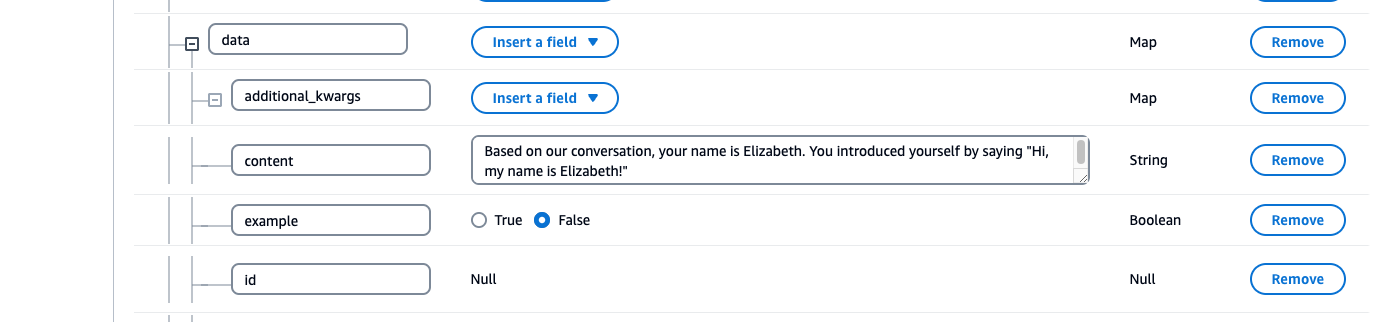